In [1]:
import pickle
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt

from datetime import datetime

import statsmodels.api as sm
import pylab as py

# Import data

In [2]:
# read AG true results
#open
with open('aG_true_densities.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    # print(myvar)
dfa, dfa_sum = myvar

In [3]:
# read AG true results
#open
with open('aG_true_densities_1st_pval.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    # print(myvar)
dfa2, dfa2_sum = myvar

In [4]:
# read AG rand results
#open
with open('aG_rand_results.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    # print(myvar)
dfa_rands, dfa_sum_rands = myvar

In [5]:
dfa.reset_index(drop=True, inplace = True)
dfa_sum.reset_index(drop=True, inplace = True)

In [6]:
# read CG true results
#open
with open('CG_true_densities.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    # print(myvar)
dfc, dfc_sum = myvar

with open('CG_true_densities_1st_pval.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    # print(myvar)
dfc2, dfc2_sum = myvar

# read CG rand results
#open
with open('CG_rand_results.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    # print(myvar)
dfc_rands, dfc_sum_rands = myvar

In [7]:
dfc.reset_index(drop=True, inplace = True)
dfc_sum.reset_index(drop=True, inplace = True)

In [8]:
dfc2_sum

,Attributes,G,Thetas,SumBal,pvals
0,"(0,)",1,"(0.0, 0.5)",192.0,0.990
1,"(1,)",1,"(0.0, 0.5)",240.0,0.060
2,"(2,)",1,"(0.0, 0.5)",258.0,0.420
3,"(3,)",1,"(0.0, 0.5)",246.0,0.620
4,"(4,)",1,"(0.0, 0.5)",242.0,0.260
...,...,...,...,...,...
250,"(0, 1, 2, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1272.0,0.000
251,"(0, 1, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1268.0,0.010
252,"(0, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1262.0,0.050
253,"(1, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1330.0,0.000


# Calculate first level p-values (not necessary, old method)

In [9]:
#model A

pvals_T = np.zeros(len(dfa_sum.index))
lens = np.array([len(arr) for arr in dfa_sum_rands.SumBal])

for ind, row in dfa_sum.iterrows():    
    pvals_T[ind] = np.sum(dfa_sum_rands.iloc[ind].SumBal >= dfa_sum.iloc[ind].SumBal)

dfa_sum["pvals"] = pvals_T / lens
dfa_sum

,Attributes,G,Thetas,SumBal,pvals
0,"(0,)",1,"(0.0, 0.5)",242.0,0.28
1,"(1,)",1,"(0.0, 0.5)",258.0,0.41
2,"(2,)",1,"(0.0, 0.5)",240.0,0.06
3,"(3,)",1,"(0.0, 0.5)",226.0,0.73
4,"(4,)",1,"(0.0, 0.5)",192.0,1.00
...,...,...,...,...,...
250,"(0, 1, 2, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1290.0,0.00
251,"(0, 1, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1262.0,0.00
252,"(0, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1268.0,0.00
253,"(1, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1236.0,0.00


In [10]:
a_prob_reject_1lvl = np.zeros(8)
ns = list(range(1,9))

for n in ns:
    inds = dfa_sum.G == n
    comb_cnt = len(dfa_sum.loc[inds])
    a_prob_reject_1lvl[n-1] = np.sum(dfa_sum.loc[inds].pvals < 0.05) / comb_cnt


a2_prob_reject_1lvl = np.zeros(8)
ns = list(range(1,9))

for n in ns:
    inds = dfa2_sum.G == n
    comb_cnt = len(dfa2_sum.loc[inds])
    a2_prob_reject_1lvl[n-1] = np.sum(dfa2_sum.loc[inds].pvals <= 0.05001) / comb_cnt


In [11]:
#model C

pvals_T = np.zeros(len(dfc_sum.index))
lens = np.array([len(arr) for arr in dfc_sum_rands.SumBal])

for ind, row in dfc_sum.iterrows():    
    pvals_T[ind] = np.sum(dfc_sum_rands.iloc[ind].SumBal >= dfc_sum.iloc[ind].SumBal)

dfc_sum["pvals"] = pvals_T / lens
dfc_sum

,Attributes,G,Thetas,SumBal,pvals
0,"(0,)",1,"(0.0, 0.5)",192.0,0.99
1,"(1,)",1,"(0.0, 0.5)",240.0,0.06
2,"(2,)",1,"(0.0, 0.5)",258.0,0.42
3,"(3,)",1,"(0.0, 0.5)",246.0,0.62
4,"(4,)",1,"(0.0, 0.5)",242.0,0.26
...,...,...,...,...,...
250,"(0, 1, 2, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1272.0,0.01
251,"(0, 1, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1268.0,0.01
252,"(0, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1262.0,0.08
253,"(1, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1330.0,0.00


In [12]:
c_prob_reject_1lvl = np.zeros(8)
ns = list(range(1,9))

for n in ns:
    inds = dfc_sum.G == n
    comb_cnt = len(dfc_sum.loc[inds])
    c_prob_reject_1lvl[n-1] = np.sum(dfc_sum.loc[inds].pvals < 0.05) / comb_cnt

c2_prob_reject_1lvl = np.zeros(8)
ns = list(range(1,9))

for n in ns:
    inds = dfc2_sum.G == n
    comb_cnt = len(dfc2_sum.loc[inds])
    c2_prob_reject_1lvl[n-1] = np.sum(dfc2_sum.loc[inds].pvals <= 0.05001) / comb_cnt

# Plotting main paper fig

Text(0, 0.5, 'Ratio of rejected first level tests')

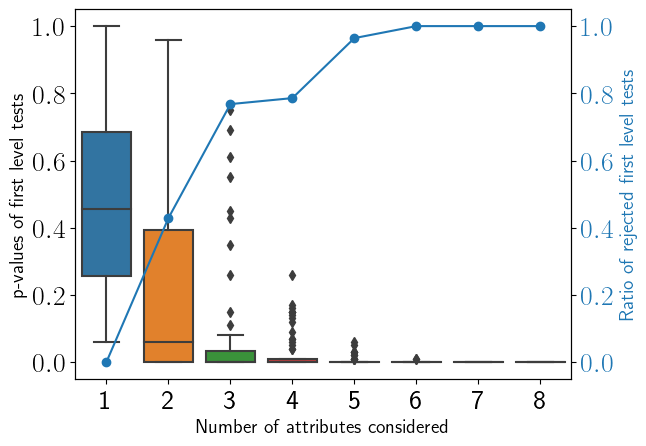

In [58]:
b = sns.boxplot(data = dfa_sum, x = "G", y = "pvals")

b.set_xlabel("Number of attributes considered", fontsize = 14)
b.set_ylabel("p-values of first level tests", fontsize = 14)
# b.set_title("", fontsize = 16)

ax2 = b.twinx()

ax2.plot(list(range(8)), a_prob_reject_1lvl, marker="o", color = "tab:blue")
# ax2.set_xlabel("Number of attributes considered", fontsize = 14)
ax2.tick_params(axis='y', labelcolor="tab:blue")
ax2.set_ylabel("Ratio of rejected first level tests", fontsize = 14, color = "tab:blue")

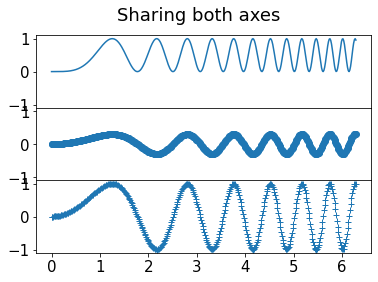

In [7]:
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

/tmp/ipykernel_83904/4243815797.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ytl)


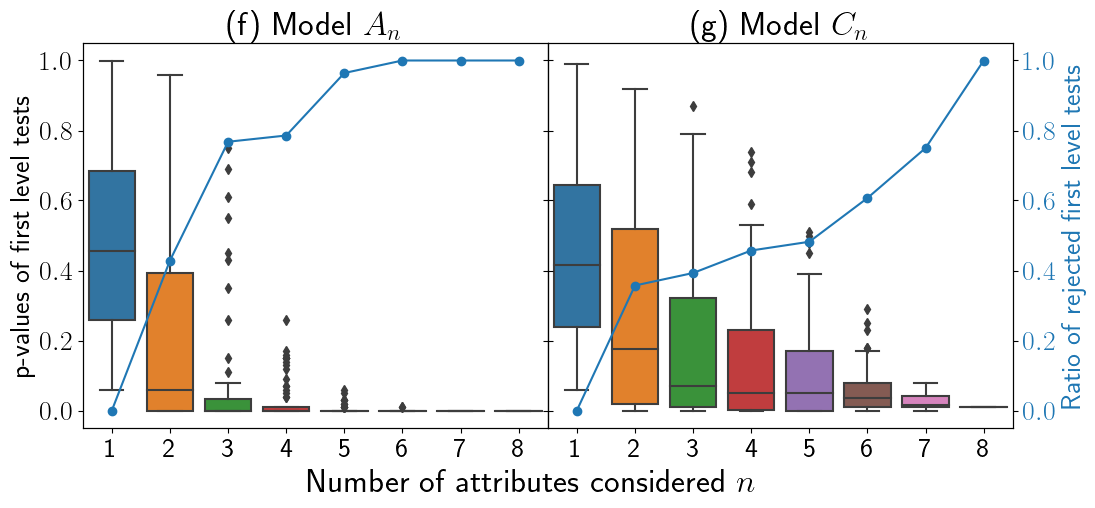

In [62]:
save_ = False

fig = plt.figure()
gs = fig.add_gridspec(1, 2, wspace=0)
axs = gs.subplots(sharex=True, sharey=True)
axs2 = []

sns.boxplot(ax = axs[0], data = dfa_sum, x = "G", y = "pvals")
axs[0].set_xlabel("")
axs[0].set_ylabel("p-values of first level tests")

ax2 = axs[0].twinx()
axs2.append(ax2)

ax2.plot(list(range(8)), a_prob_reject_1lvl, marker="o", color = "tab:blue")
# ax2.set_xlabel("Number of attributes considered", fontsize = 14)
ax2.set_xlabel("")
ax2.tick_params(axis='y', labelcolor="tab:blue")
# ax2.set_ylabel("Ratio of rejected first level tests", fontsize = 14, color = "tab:blue")

ytl = ax2.get_yticklabels()
for it in range(len(ytl)):
    ytl[it].set_text('')
    ax2.set_yticklabels(ytl)

b = sns.boxplot(ax = axs[1], data = dfc_sum, x = "G", y = "pvals")
b.set_xlabel("")
b.set_ylabel("")
# b.set_xlabel("Number of attributes considered", fontsize = 14)

ax2 = b.twinx()
axs2.append(ax2)

ax2.plot(list(range(8)), c_prob_reject_1lvl, marker="o", color = "tab:blue")
ax2.set_xlabel("")
ax2.tick_params(axis='y', labelcolor="tab:blue")
ax2.set_ylabel("Ratio of rejected first level tests", color = "tab:blue")


# # Hide x labels and tick labels for all but bottom plot.
# for ax in axs:
#     ax.label_outer()
#     ax.plot((0,1),(0,0), color='black')

plt.rcParams['text.usetex'] = True
    
axs[0].set_title(r'(f) Model $A_n$')
axs[1].set_title(r'(g) Model $C_n$')
fig.supxlabel(r'Number of attributes considered $n$', y=-0.03)
# axs[0].set_ylabel(r'$p_D-p_M$')
# plt.title('(d) Model E8')
fig.set_size_inches(12, 5)
plt.rcParams.update({'font.size': 20})

if save_:
    plt.savefig("models-varying-n.pdf",dpi=600,bbox_inches='tight',format='pdf')

/tmp/ipykernel_83904/3746543487.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ytl)


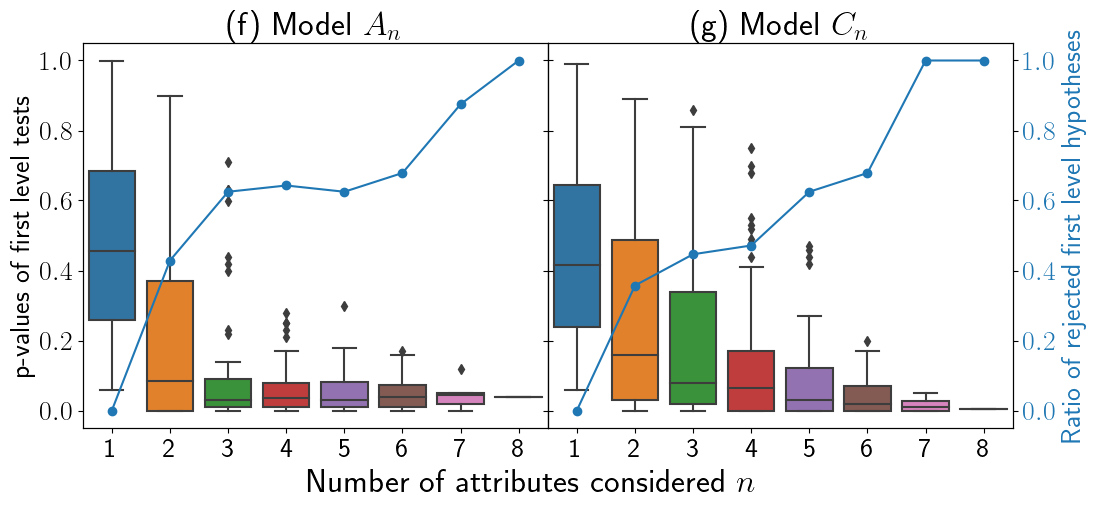

In [76]:
save_ = True

fig = plt.figure()
gs = fig.add_gridspec(1, 2, wspace=0)
axs = gs.subplots(sharex=True, sharey=True)
axs2 = []

sns.boxplot(ax = axs[0], data = dfa2_sum, x = "G", y = "pvals")
axs[0].set_xlabel("")
axs[0].set_ylabel("p-values of first level tests")

ax2 = axs[0].twinx()
axs2.append(ax2)

ax2.plot(list(range(8)), a2_prob_reject_1lvl, marker="o", color = "tab:blue")
# ax2.set_xlabel("Number of attributes considered", fontsize = 14)
ax2.set_xlabel("")
ax2.tick_params(axis='y', labelcolor="tab:blue")
# ax2.set_ylabel("Ratio of rejected first level tests", fontsize = 14, color = "tab:blue")

ytl = ax2.get_yticklabels()
for it in range(len(ytl)):
    ytl[it].set_text('')
    ax2.set_yticklabels(ytl)

b = sns.boxplot(ax = axs[1], data = dfc2_sum, x = "G", y = "pvals")
b.set_xlabel("")
b.set_ylabel("")
# b.set_xlabel("Number of attributes considered", fontsize = 14)

ax2 = b.twinx()
axs2.append(ax2)

ax2.plot(list(range(8)), c2_prob_reject_1lvl, marker="o", color = "tab:blue")
ax2.set_xlabel("")
ax2.tick_params(axis='y', labelcolor="tab:blue")
ax2.set_ylabel("Ratio of rejected first level hypotheses", color = "tab:blue")


# # Hide x labels and tick labels for all but bottom plot.
# for ax in axs:
#     ax.label_outer()
#     ax.plot((0,1),(0,0), color='black')

plt.rcParams['text.usetex'] = True
    
axs[0].set_title(r'(f) Model $A_n$')
axs[1].set_title(r'(g) Model $C_n$')
fig.supxlabel(r'Number of attributes considered $n$', y=-0.03)
# axs[0].set_ylabel(r'$p_D-p_M$')
# plt.title('(d) Model E8')
fig.set_size_inches(12, 5)
plt.rcParams.update({'font.size': 20})

if save_:
    plt.savefig("models-varying-n2.pdf",dpi=600,bbox_inches='tight',format='pdf')

In [13]:
a2_prob_reject_1lvl

array([0.        , 0.42857143, 0.625     , 0.64285714, 0.625     ,
       0.67857143, 0.875     , 1.        ])

In [14]:
c2_prob_reject_1lvl

array([0.        , 0.35714286, 0.44642857, 0.47142857, 0.625     ,
       0.67857143, 1.        , 1.        ])